In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from scipy.stats import truncnorm

from faker import Faker

In [2]:
fake = Faker()
total_customers = 2048

In [3]:
# 0. Generate 'customer_id'
customer_id = [i for i in range(1, total_customers + 1)]

In [4]:
# 1. Generate customer names
name = [fake.name() for _ in range(total_customers)]

In [5]:
# 2. Generate age data using trauncated log-normal distribution
mean_age = 25
std_age = 1.5
min_age = 10
max_age = 80

loga, logb = (np.log(min_age) - np.log(mean_age))/ np.log(std_age), (np.log(max_age) - np.log(mean_age))/ np.log(std_age)

age = np.exp(truncnorm.rvs(a=loga, b=logb, loc=np.log(mean_age), scale=np.log(std_age), size=total_customers)).round(0).astype(int)

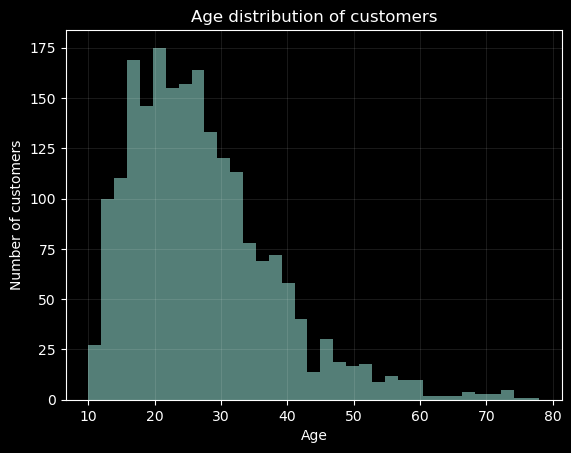

In [6]:
plt.hist(age, bins=35, density=False, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.title("Age distribution of customers")
plt.grid(alpha=0.1)
plt.show()

In [7]:
# 3. Generate gender data using weighted probabilities
gender_probabilities = [0.48, 0.49, 0.03]

gender = np.random.choice(['male', 'female', 'other'], size=total_customers, p=gender_probabilities)

In [8]:
cat, counts = np.unique(gender, return_counts=True)
di = dict(zip(cat, counts))

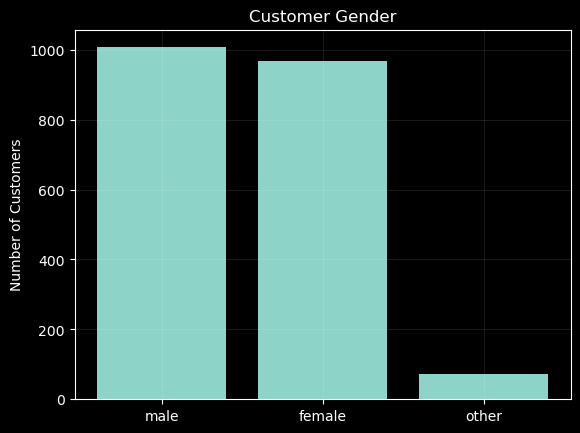

In [9]:
plt.bar(['male', 'female', 'other'], [di['male'], di['female'], di['other']], align='center')
plt.title("Customer Gender")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.1)
plt.show()

In [10]:
# 4. Generate income distribution using log-normal distribution
mean_inc = np.log(30000)
std_inc = np.log(1.5)

income = np.random.lognormal(mean=mean_inc, sigma=std_inc, size=total_customers).round(0).astype(int)

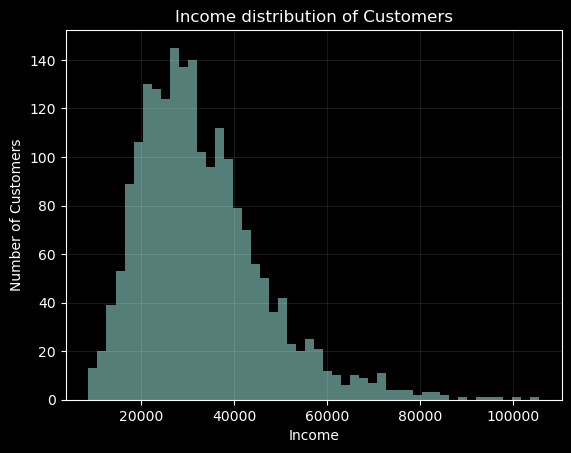

In [11]:
plt.hist(income, bins=50, density=False, alpha=0.6)
plt.title('Income distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.grid(alpha=0.1)
plt.show()

In [12]:
# 5. Generate family size using poisson distribution
mean_fam_size = 4.0

family_size = np.random.poisson(lam=mean_fam_size, size=total_customers)

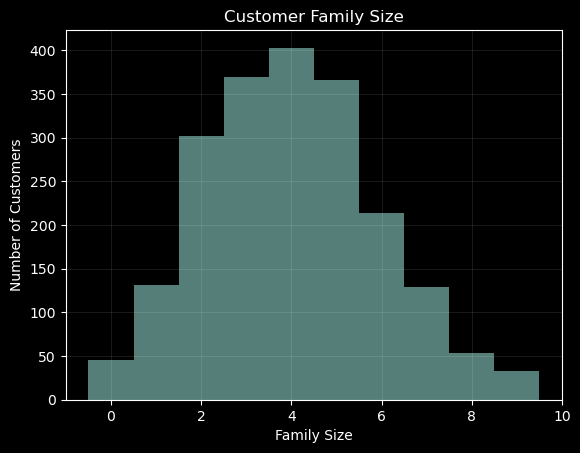

In [13]:
plt.hist(family_size, bins=range(max(family_size)), align="left", alpha=0.6)
plt.title("Customer Family Size")
plt.xlabel("Family Size")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.1)
plt.show()

In [14]:
# 6. Generate distance data using exponential distribution
decay_rate = 0.45
distance_to_shop = np.random.exponential(1/decay_rate, size=total_customers).round(2)

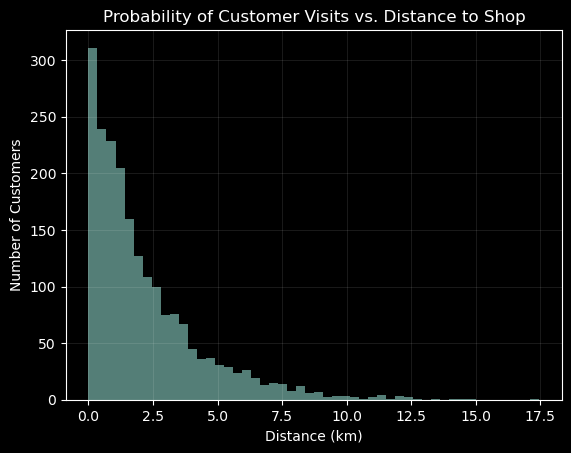

In [15]:
plt.hist(distance_to_shop, bins=50, alpha=0.6)
plt.xlabel('Distance (km)')
plt.ylabel('Number of Customers')
plt.title("Probability of Customer Visits vs. Distance to Shop")
plt.grid(alpha=0.1)
plt.show()

In [16]:
# 7. Generate Lifestyle data
lifestyle_probabilities = [0.65, 0.25, 0.1]

lifestyle = np.random.choice(['active', 'sedentary', 'health_conscious'], p=lifestyle_probabilities, size=total_customers)

In [17]:
cat, counts = np.unique(lifestyle, return_counts=True)

di = dict(zip(cat, counts))

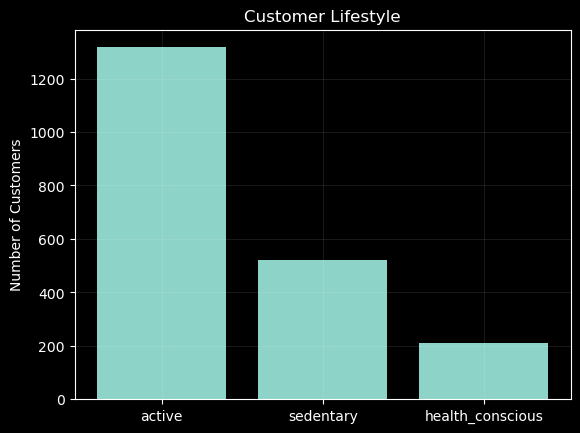

In [18]:
plt.bar(['active', 'sedentary', 'health_conscious'], [di['active'], di['sedentary'], di['health_conscious']], align='center')
plt.title("Customer Lifestyle")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.1)
plt.show()

In [19]:
# 8. Generate Preferences data
preferences_probabilities = [0.38, 0.35, 0.2, 0.07]

food_preferences = np.random.choice(['vegetarian', 'non-vegetarian', 'vegan', 'gluten-free'], p=preferences_probabilities, size=total_customers)

In [20]:
cat, counts = np.unique(food_preferences, return_counts=True)

di = dict(zip(cat, counts))

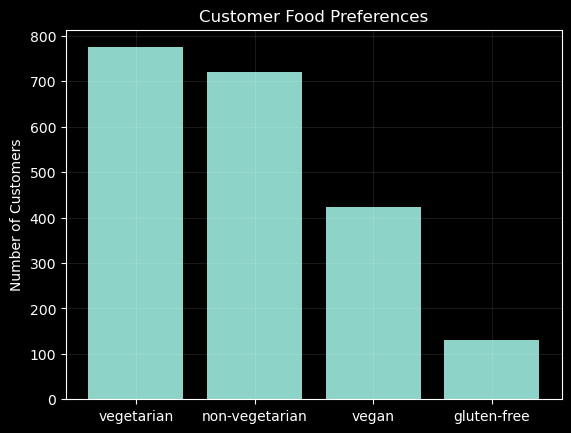

In [21]:
plt.bar(['vegetarian', 'non-vegetarian', 'vegan', 'gluten-free'], [di['vegetarian'], di['non-vegetarian'], di['vegan'], di['gluten-free']], align='center')
plt.title("Customer Food Preferences")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.1)
plt.show()

In [22]:
# 9. Generate Interests data
interest_probabilities = [0.35, 0.10, 0.25, 0.20, 0.10]

interest = np.random.choice(['celebratory_cakes', 'gourmet_and_baking_enthusiast', 'foodies', 'socializing', 'health_and_nutrition'], p=interest_probabilities, size=total_customers)

In [23]:
cat, counts = np.unique(interest, return_counts=True)

di = dict(zip(cat, counts))

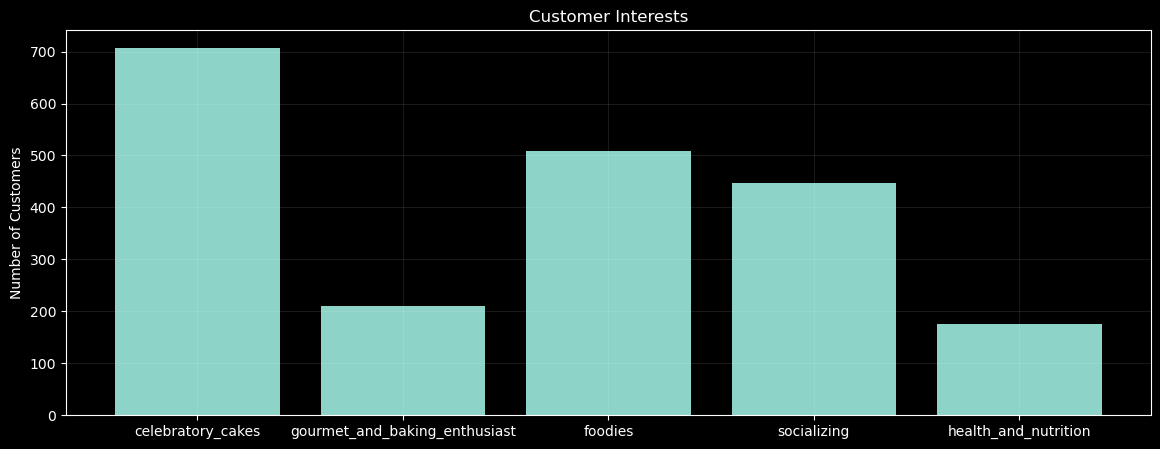

In [24]:
plt.figure(figsize=(14, 5))
plt.bar(['celebratory_cakes', 'gourmet_and_baking_enthusiast', 'foodies', 'socializing', 'health_and_nutrition'], [di['celebratory_cakes'], di['gourmet_and_baking_enthusiast'], di['foodies'], di['socializing'], di['health_and_nutrition']], align='center')
plt.title("Customer Interests")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.1)
plt.show()

In [25]:
#10. Generate Martial Status data considering that the mean age at which people marry is 30.
probability_unmarried = truncnorm.cdf(np.log(30), a=loga, b=logb, loc=np.log(mean_age), scale=np.log(std_age))

martial_status = ['unmarried' if np.random.random() <= probability_unmarried else 'married' for _ in range(total_customers)]

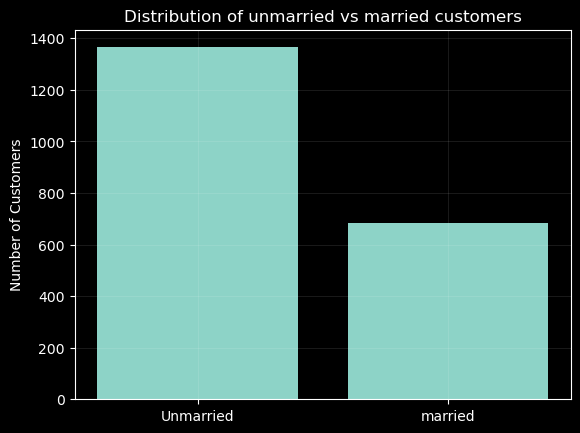

In [26]:
# print(f"Mean: {sum(martial_status)/total_customers}")
plt.bar(['Unmarried', 'married'], [martial_status.count('unmarried'), martial_status.count('married')], align='center')
plt.title("Distribution of unmarried vs married customers")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.1)
plt.show()

In [27]:
# 11. Generate vehicle data: This is a boolean variable
has_vehicle_probability = [0.8, 0.2]

vehicle = np.random.choice(['has_vehicle', 'does_not_have_vehicle'], p=has_vehicle_probability, size=total_customers)

In [28]:
cat, counts = np.unique(vehicle, return_counts=True)

di = dict(zip(cat, counts))

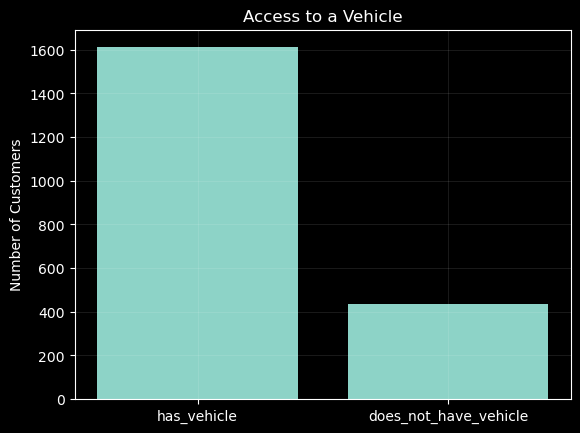

In [29]:
plt.bar(['has_vehicle', 'does_not_have_vehicle'], [di['has_vehicle'], di['does_not_have_vehicle']], align='center')
plt.title("Access to a Vehicle")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.1)
plt.show()

In [30]:
# 12. Generate emails
email = [fake.email() for _ in range(total_customers)]

In [31]:
# 13. Generate Phone numbers
phone = [fake.phone_number() for _ in range(total_customers)]

In [32]:
customers = pd.DataFrame({
    'customer_id': customer_id,'name': name, 'age': age, 'gender': gender, 'income_level': income, 'family_size': family_size,
    'distance_to_shop(km)': distance_to_shop, 'lifestyle': lifestyle, 'food_preferences': food_preferences, 'interest': interest,
    'martial_status': martial_status, 'vehicle': vehicle, 'email': email, 'phone': phone
})

In [33]:
customers

,customer_id,name,age,gender,income_level,family_size,distance_to_shop(km),lifestyle,food_preferences,interest,martial_status,vehicle,email,phone
0,1,Amanda Hart MD,38,male,16973,5,0.93,active,gluten-free,foodies,unmarried,does_not_have_vehicle,joseph72@example.org,6267747492
1,2,Teresa Butler,52,male,71783,2,1.98,sedentary,vegetarian,gourmet_and_baking_enthusiast,married,has_vehicle,bowenpaul@example.org,4023220789
2,3,Michael Rogers,11,male,20100,9,4.96,active,non-vegetarian,foodies,unmarried,has_vehicle,lisalin@example.com,868-486-7014
3,4,Dana Gallegos,45,female,43356,6,0.21,active,vegetarian,foodies,unmarried,has_vehicle,qhale@example.org,001-233-690-0456x072
4,5,Paige Monroe,43,male,32392,3,1.13,sedentary,non-vegetarian,health_and_nutrition,unmarried,does_not_have_vehicle,gcampbell@example.org,934-244-7025x5377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,Heather Weber,22,male,20712,3,1.76,health_conscious,vegan,celebratory_cakes,unmarried,has_vehicle,ulara@example.net,909-742-0975x7070
2044,2045,Shannon Ponce,12,male,39604,2,0.82,active,vegetarian,celebratory_cakes,unmarried,does_not_have_vehicle,ashley39@example.org,230-424-8584x792
2045,2046,Theresa Smith,26,male,33820,2,6.46,active,vegan,socializing,unmarried,does_not_have_vehicle,owensjoshua@example.com,524.586.4779x675
2046,2047,Chelsea Jennings,31,other,36990,1,0.78,health_conscious,vegetarian,foodies,unmarried,does_not_have_vehicle,brianbryant@example.org,591.810.4109x387


In [34]:
low_percentile = np.percentile(income, 25)
high_percentile = np.percentile(income, 75)

def income_bracket(income) -> str:
    if income <= low_percentile:
        return 'low'
    elif low_percentile < income < high_percentile:
        return 'medium'
    elif income >= high_percentile:
        return 'high'
    

customers['income_level'] = customers['income_level'].apply(income_bracket)
customers

,customer_id,name,age,gender,income_level,family_size,distance_to_shop(km),lifestyle,food_preferences,interest,martial_status,vehicle,email,phone
0,1,Amanda Hart MD,38,male,low,5,0.93,active,gluten-free,foodies,unmarried,does_not_have_vehicle,joseph72@example.org,6267747492
1,2,Teresa Butler,52,male,high,2,1.98,sedentary,vegetarian,gourmet_and_baking_enthusiast,married,has_vehicle,bowenpaul@example.org,4023220789
2,3,Michael Rogers,11,male,low,9,4.96,active,non-vegetarian,foodies,unmarried,has_vehicle,lisalin@example.com,868-486-7014
3,4,Dana Gallegos,45,female,high,6,0.21,active,vegetarian,foodies,unmarried,has_vehicle,qhale@example.org,001-233-690-0456x072
4,5,Paige Monroe,43,male,medium,3,1.13,sedentary,non-vegetarian,health_and_nutrition,unmarried,does_not_have_vehicle,gcampbell@example.org,934-244-7025x5377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,Heather Weber,22,male,low,3,1.76,health_conscious,vegan,celebratory_cakes,unmarried,has_vehicle,ulara@example.net,909-742-0975x7070
2044,2045,Shannon Ponce,12,male,medium,2,0.82,active,vegetarian,celebratory_cakes,unmarried,does_not_have_vehicle,ashley39@example.org,230-424-8584x792
2045,2046,Theresa Smith,26,male,medium,2,6.46,active,vegan,socializing,unmarried,does_not_have_vehicle,owensjoshua@example.com,524.586.4779x675
2046,2047,Chelsea Jennings,31,other,medium,1,0.78,health_conscious,vegetarian,foodies,unmarried,does_not_have_vehicle,brianbryant@example.org,591.810.4109x387


In [35]:
customers.to_csv("Data/customers.csv")